# Limpeza de dados


In [ ]:
# Importa dados, string vazio como NA, string como fatores

In [112]:
import pandas as pd
import seaborn as srn
import statistics as sts
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('Churn.csv', sep=';')
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [6]:
dataset.shape


(999, 12)

In [8]:
dataset.columns = ['Id','Score','Estado','Genero', 'Idade', 'Patrimonio','Saldo','Pordutos','TemCartCredito','Ativo','Salario','Saiu']

In [9]:
dataset.head()


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Pordutos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


# Inicio da análise exploratória dos dados Categóricos

Para dados categóricos é contado as categorias, verificado se as categorias se encaixam e usado o gráfico de setores ou gráfico de barras.

In [12]:
# Explorar a Categoria Estados
# Os estados válidos são os do Sul do país. 
# É feito um agrupamento para verificar os dados 
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: >

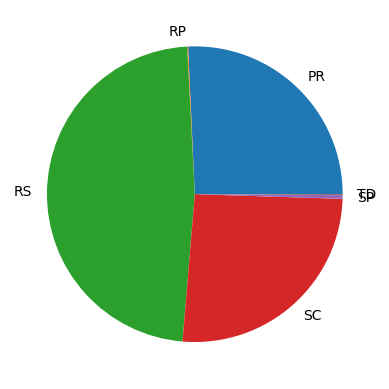

In [23]:
#Gráfico de setor
agrupado.plot.pie()


<Axes: xlabel='Estado'>

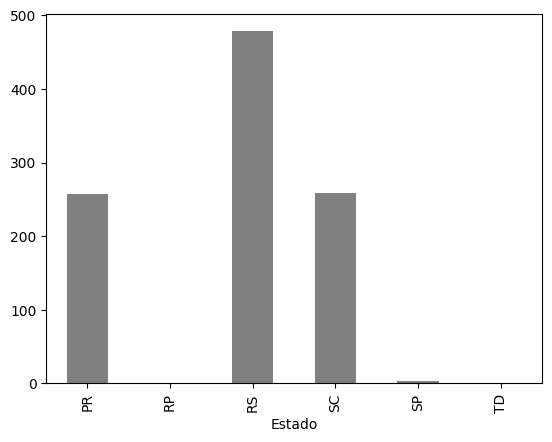

In [27]:
# Gráfico de Barras
agrupado.plot.bar(color='gray')

In [29]:
# Explorar o Genero no sentido estatístico 
agrupado = dataset.groupby('Genero').size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: >

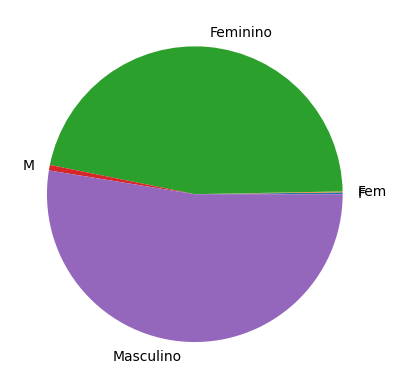

In [30]:
agrupado.plot.pie()

<Axes: xlabel='Genero'>

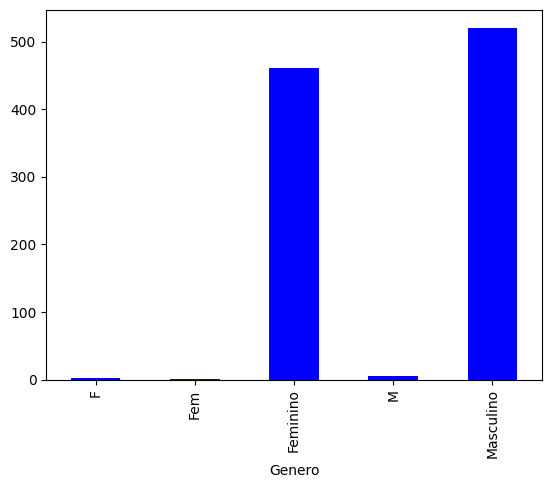

In [31]:
agrupado.plot.bar(color='blue')

# Inicio da análise exploratória dos dados Numéricos

Para dados numéricos usa-se um resumo estatístico e o gráfico histograma ou boxplot

In [34]:
# Iniciando a exploração com uma visualização estatistica
dataset.loc[:,'Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

<Axes: >

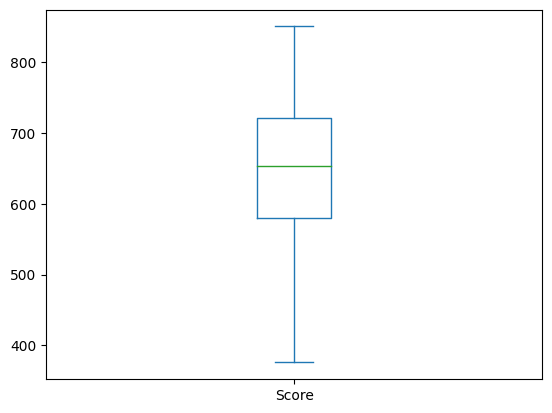

In [42]:
# Visualizar os dados com um bloxplot a fim de observar melhor a distrubição dos dados
dataset.loc[:,'Score'].plot.box()


Text(0.5, 1.0, 'Score')

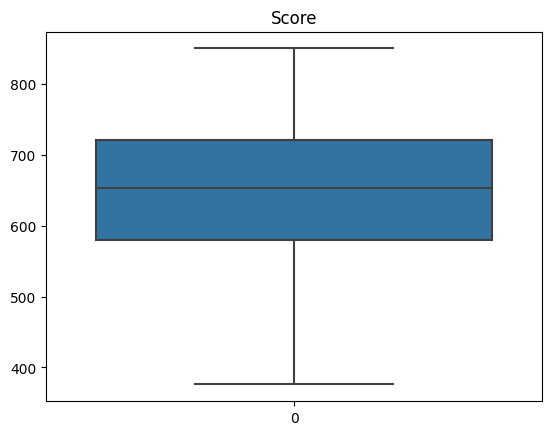

In [51]:
# Fazer a mesma visualização com o Seabom
srn.boxplot(dataset.loc[:,'Score']).set_title('Score')

<Axes: ylabel='Frequency'>

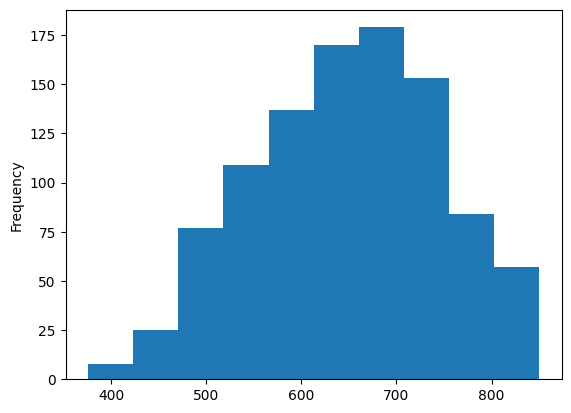

In [44]:
# visualizar com gráfihistco de histograma
dataset.loc[:,'Score'].plot.hist()

Text(0.5, 1.0, 'Score')

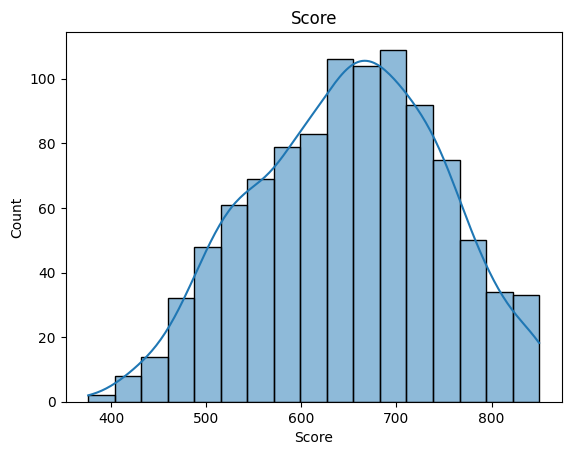

In [58]:
# Fazer a mesma visualização com o Seabom
srn.histplot(dataset.loc[:,'Score'], kde=True).set_title('Score')

In [60]:
# Agora verificar a idade

dataset.loc[:, 'Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

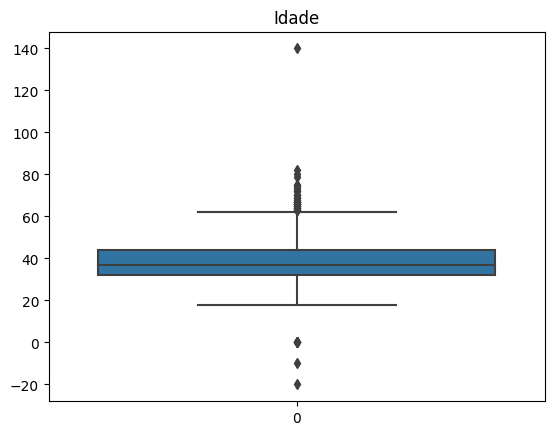

In [64]:
srn.boxplot(dataset.loc[:, 'Idade']).set_title('Idade')

Text(0.5, 1.0, 'Idade')

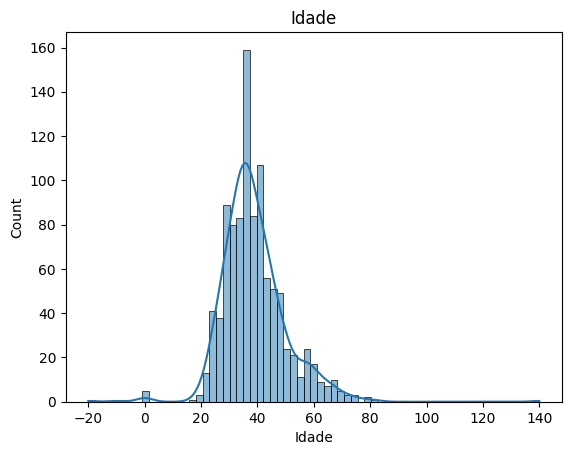

In [67]:
srn.histplot(dataset.loc[:,'Idade'], kde=True).set_title('Idade')


In [68]:
# Verificar o saldo
dataset.loc[:,'Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

<Axes: >

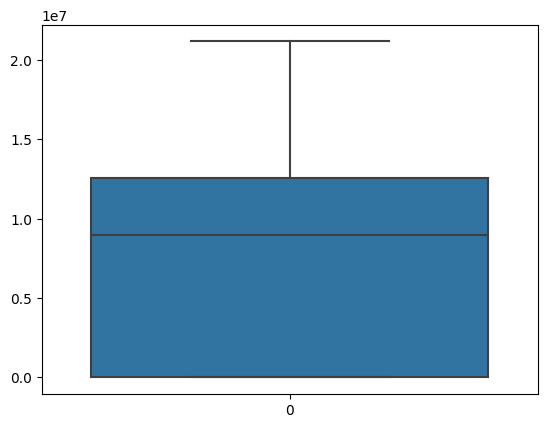

In [69]:
srn.boxplot(dataset.loc[:,'Saldo']).set_title('Saldo')

Text(0.5, 1.0, 'Saldo')

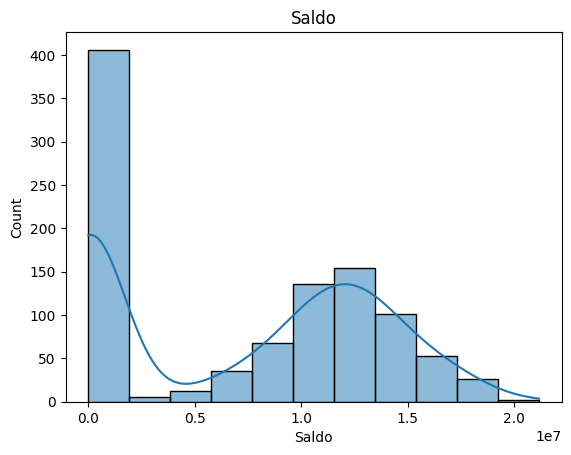

In [70]:
srn.histplot(dataset.loc[:,'Saldo'], kde=True).set_title('Saldo')


In [71]:
# Salário
dataset.loc[:,'Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

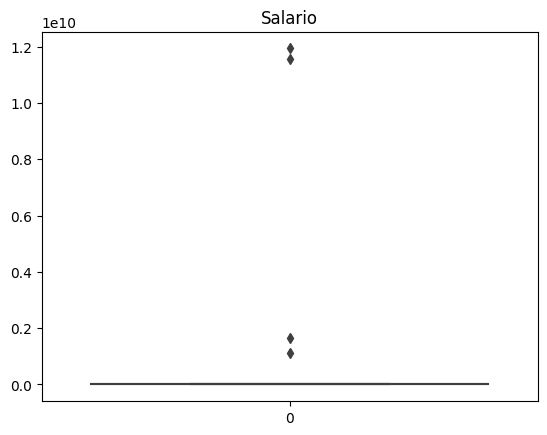

In [73]:
srn.boxplot(dataset.loc[:,'Salario']).set_title('Salario')

Text(0.5, 1.0, 'Salario')

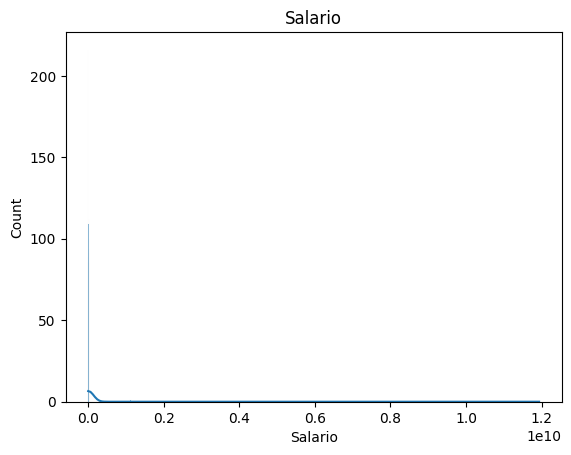

In [75]:
srn.histplot(dataset.loc[:,'Salario'], kde=True).set_title('Salario')

In [76]:
# Contar os valores NA
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Pordutos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

# Tratamento dos dados

Neste ponto iremos tratar os dados preparando para o modelo.

In [86]:
# Substitur os valores NA de salário com a mediana
mediana = sts.median(dataset.loc[:,'Salario'])
print(f'A mediana do Salário é: {mediana}')

dataset.loc[:,'Salario'].fillna(mediana, inplace=True)

dataset.loc[:,'Salario'].isnull().sum()

A mediana do Salário é: 8641028.0


0

In [91]:
# Substitur os valores NA de Genero com a mediana
# Primeiro substituir os valores para padronizar os dados
agrupado = dataset.groupby('Genero').size()
display(agrupado)

dataset.loc[dataset['Genero'] == 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset['Genero'].isin(['F', 'Fem']), 'Genero'] = 'Feminino'

# visualiza o resultado
agrupado = dataset.groupby('Genero').size()
display(agrupado)

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

Genero
Feminino     464
Masculino    527
dtype: int64

In [93]:
# Segundo, fazer a substituição dos valores NA pela moda
dataset.loc[:,'Genero'].fillna('Masculino', inplace=True)
display(dataset.loc[:,'Genero'].isnull().sum())

agrupado = dataset.groupby('Genero').size()
display(agrupado)

0

Genero
Feminino     464
Masculino    535
dtype: int64

In [97]:
#Tratar os dados referentes à idade
# Ver quantos casos de idaddes negativas ou maiores que 120

display(dataset.loc[(dataset.loc[:, 'Idade'] < 0 ) | (dataset.loc[:, 'Idade'] > 120)].shape[0])
display(dataset.loc[(dataset.loc[:, 'Idade'] < 0 ) | (dataset.loc[:, 'Idade'] > 120)])

3

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Pordutos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [98]:
mediana = sts.median(dataset.loc[:,'Idade'])
dataset.loc[(dataset.loc[:, 'Idade'] < 0 ) | (dataset.loc[:, 'Idade'] > 120), 'Idade'] = mediana 

display(dataset.loc[(dataset.loc[:, 'Idade'] < 0 ) | (dataset.loc[:, 'Idade'] > 120)].shape[0])
display(dataset.loc[(dataset.loc[:, 'Idade'] < 0 ) | (dataset.loc[:, 'Idade'] > 120)])

0

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Pordutos,TemCartCredito,Ativo,Salario,Saiu


count    999.000000
mean      38.903904
std       10.672421
min        0.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

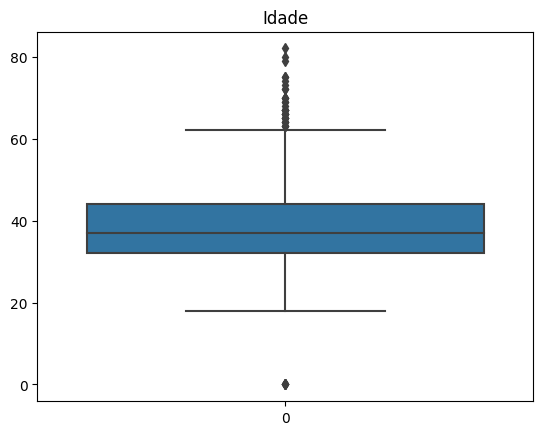

In [102]:
display(dataset.loc[:,'Idade'].describe())
srn.boxplot(dataset.loc[:,'Idade']).set_title('Idade')

<Axes: xlabel='Idade', ylabel='Count'>

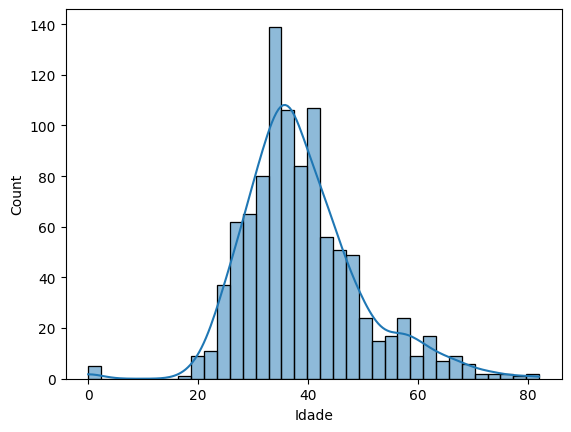

In [105]:
srn.histplot(dataset.loc[:,'Idade'], kde=True)densitybool

Text(0.5, 1.0, 'Idade')

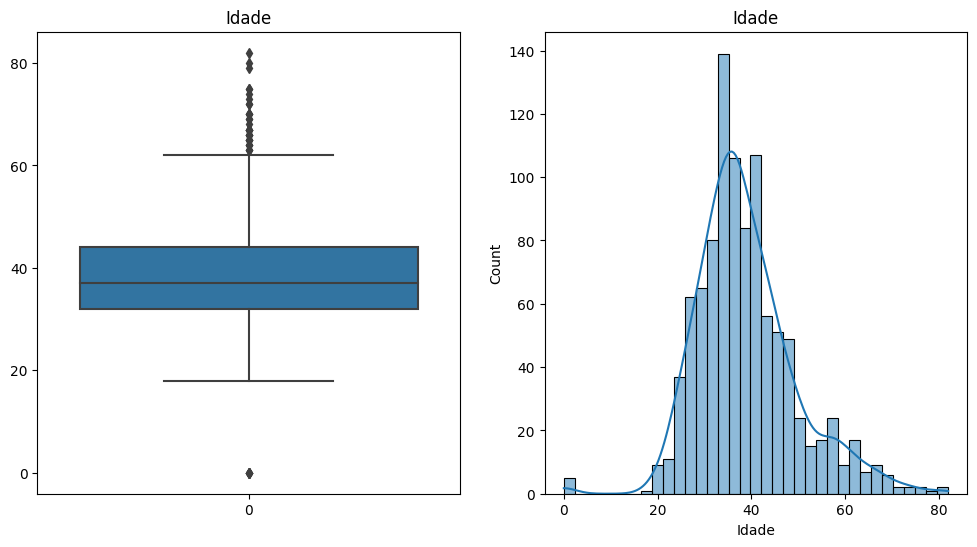

In [110]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
srn.boxplot(dataset.loc[:,'Idade'], ax=ax1).set_title('Idade')
srn.histplot(dataset.loc[:,'Idade'], kde=True, ax=ax2).set_title('Idade')

In [114]:
# Verificar e remover Dados Duplicados
dataset.loc[dataset.duplicated(['Id'],keep=False)]

dataset.drop_duplicates(subset='Id', keep='first', inplace=True)

dataset.loc[dataset.duplicated(['Id'],keep=False)]


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Pordutos,TemCartCredito,Ativo,Salario,Saiu


In [120]:
# Estados fora do dominio. Substituir pela moda
agrupado = dataset.groupby('Estado').size()
display(agrupado)
print()

dataset.loc[dataset.loc[:,'Estado'].isin(['RP','SP','TD']),'Estado'] = 'RS'

agrupado = dataset.groupby('Estado').size()
display(agrupado)


Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

Estado
PR    257
RS    483
SC    258
dtype: int64

Text(0.5, 1.0, 'Estado')

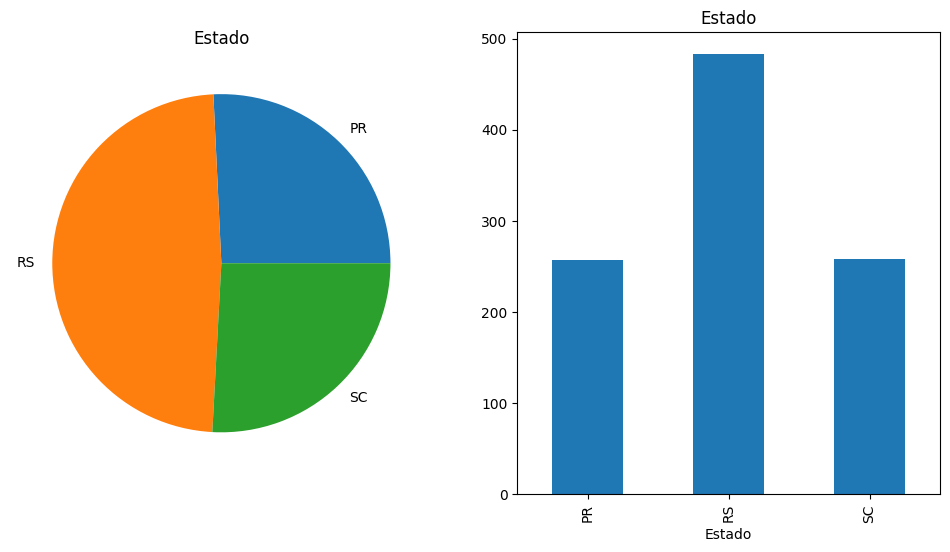

In [127]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
agrupado.plot.pie(ax=ax1).set_title('Estado')
agrupado.plot.bar(ax=ax2).set_title('Estado')

count    9.980000e+02
mean     3.505879e+07
std      5.289889e+08
min      9.677000e+03
25%      2.849010e+06
50%      8.637196e+06
75%      1.401381e+07
max      1.193469e+10
Name: Salario, dtype: float64

Series([], Name: Salario, dtype: float64)

count    9.980000e+02
mean     8.782277e+06
std      6.066205e+06
min      9.677000e+03
25%      2.849010e+06
50%      8.635279e+06
75%      1.391447e+07
max      1.997254e+07
Name: Salario, dtype: float64

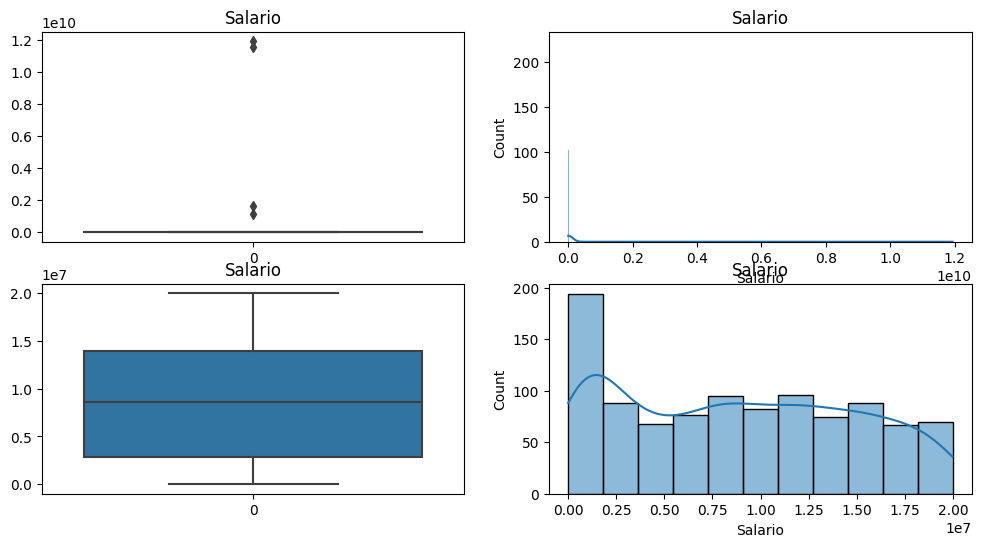

In [135]:
#outiliers em salário, Vamos considerar 2 desvio padrão
desv = sts.stdev(dataset.loc[:,'Salario'])*2
desv

# E iremos substituir pela mediana
mediana = sts.median(dataset.loc[:,'Salario'])

display(dataset.loc[:,'Salario'].describe())

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12,6))
srn.boxplot(dataset.loc[:,'Salario'],ax=ax1).set_title('Salario')
srn.histplot(dataset.loc[:,'Salario'], kde=True,ax=ax2).set_title('Salario')

dataset.loc[dataset.loc[:,'Salario']>= desv,'Salario'] = mediana

display(dataset.loc[dataset.loc[:,'Salario']>= desv,'Salario'])

srn.boxplot(dataset.loc[:,'Salario'],ax=ax3).set_title('Salario')
srn.histplot(dataset.loc[:,'Salario'], kde=True,ax=ax4).set_title('Salario')

display(dataset.loc[:,'Salario'].describe())


In [136]:
dataset.head()


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Pordutos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [137]:
dataset.shape

(998, 12)